In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt

# Read and Filter Data

In [2]:
data = pd.read_csv('./merged_released.csv')
data.head()

,time,os,network interface,gps latitude,gps longitude,gps accuracy,ssid,bssid,wi-fi standard,frequency,channel,channel width,rssi,noise level,network delay (ms)
0,1696983163,Windows 10,Intel(R) Wireless-AC 9560 160MHz,-33.917936,151.232119,4.9,UNSW,54:78:1a:bf:7e:2c,802.11n,5GHz,48,40.0,-87.0,NaN,NaN
1,1696983163,Windows 10,Intel(R) Wireless-AC 9560 160MHz,-33.917936,151.232119,4.9,UNSW,00:ea:bd:e3:c0:b3,802.11n,2.4GHz,1,40.0,-80.0,NaN,NaN
2,1696983163,Windows 10,Intel(R) Wireless-AC 9560 160MHz,-33.917936,151.232119,4.9,UNSW,1c:e6:c7:0d:5c:ac,802.11n,5GHz,40,40.0,-85.5,NaN,NaN
3,1696983163,Windows 10,Intel(R) Wireless-AC 9560 160MHz,-33.917936,151.232119,4.9,UNSW,54:78:1a:bf:a6:e4,802.11ac,5GHz,64,80.0,-83.5,NaN,NaN
4,1696983163,Windows 10,Intel(R) Wireless-AC 9560 160MHz,-33.917936,151.232119,4.9,UNSW,00:ea:bd:e3:b3:5c,802.11ac,5GHz,52,80.0,-85.5,NaN,NaN


In [3]:
# Filter the dataframe for rows where the ssid is 'uniwide'
uniwide_data = data[data['ssid'] == 'uniwide']
print(f"Number of records with 'uniwide' SSID: {len(uniwide_data)}")

Number of records with 'uniwide' SSID: 15750


# RSSI Basic Analysis

In [4]:
rssi_stats = uniwide_data['rssi'].describe()
print(rssi_stats)

os_types = uniwide_data['os'].unique()
print(f"Unique OS types in the data: {os_types}")

networks = uniwide_data['ssid'].unique()
print(f"Unique networks: {networks}")


count    15750.000000
mean       -79.930794
std          8.919377
min        -96.000000
25%        -87.000000
50%        -80.000000
75%        -75.000000
max        -39.000000
Name: rssi, dtype: float64
Unique OS types in the data: ['Windows 10' 'MacOS 13.3.1(a)' 'Windows 11']
Unique networks: ['uniwide']


# Visualization Analysis

### Step 1: Singal Strength Coverage Heatmap

In [5]:
# Filter the location and rssi columns
heatmap_data = uniwide_data[['gps latitude', 'gps longitude', 'rssi']]
heatmap_data.head()

# Create a base map
map = folium.Map(location=[heatmap_data['gps latitude'].mean(), heatmap_data['gps longitude'].mean()], zoom_start=20)

# Create a heatmap layer
heatmap_layer = HeatMap(list(zip(heatmap_data['gps latitude'], heatmap_data['gps longitude'], heatmap_data['rssi'])),
                        min_opacity=0.6,
                        radius=20, blur=15,
                        max_zoom=1)

# Add the heatmap layer to the base map
map.add_child(heatmap_layer)

# Save the map as an HTML file
map.save('heatmap.html')

# Display the heatmap
map


### Step 2: OS-Specific Signal Strength Distribution Analysis

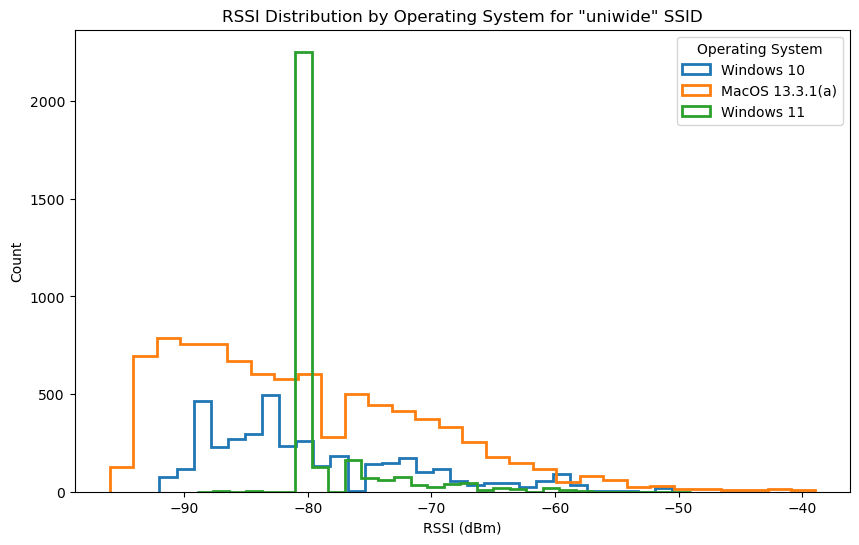

In [6]:
os_types = uniwide_data['os'].unique()

plt.figure(figsize=(10, 6))

# Plot a histogram for each OS type
for os_type in os_types:
    rssi_values = uniwide_data[uniwide_data['os'] == os_type]['rssi']
    plt.hist(rssi_values, bins=30, histtype='step', linewidth=2, label=str(os_type))

plt.title('RSSI Distribution by Operating System for "uniwide" SSID')
plt.xlabel('RSSI (dBm)')
plt.ylabel('Count')
plt.legend(title='Operating System')
plt.show()

### Step 3: OS-Specific Signal Strength Distribution Details

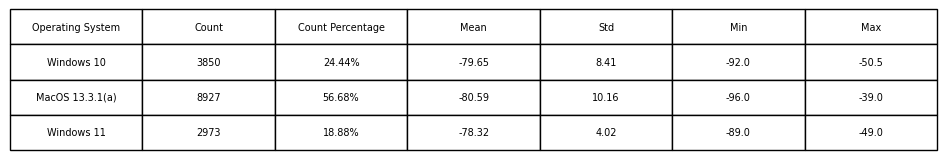

In [7]:
total_count = uniwide_data['os'].value_counts().sum()

stats_data = []

for os_type in os_types:
    rssi_values = uniwide_data[uniwide_data['os'] == os_type]['rssi']
    count = len(rssi_values)
    count_percentage = (count / total_count) * 100
    stats_data.append([
        os_type,
        count,
        f"{count_percentage:.2f}%",
        round(rssi_values.mean(), 2),
        round(rssi_values.std(), 2),
        rssi_values.min(),
        rssi_values.max()
    ])

stats_df = pd.DataFrame(stats_data, columns=['Operating System', 'Count', 'Count Percentage', 'Mean', 'Std', 'Min', 'Max'])

plt.figure(figsize=(10, 2))

table = plt.table(cellText=stats_df.values,
                  colLabels=stats_df.columns,
                  loc='center',
                  cellLoc='center',
                  bbox=[0, 0, 1, 1])

plt.tight_layout()
plt.axis('off')
plt.show()
